## Data Understanding

In [1]:
# Load pandas
import pandas as pd
# Read in dataset
trends = pd.read_csv('data/trends_kj_sisters.csv')

# Inspect data
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


So we have a column for each month since January 2007 and a column for the worldwide search interest for each of the sisters each month. 
Let's standardize the columns to make them readable

In [2]:
# Make column names easier to work with
trends.columns = ["month","kim","khloe","kourtney","kendall","kylie"]

# Inspect data
trends.head()

,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


Checking the data types and the dataframe's summary

In [3]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     147 non-null    object
 1   kim       147 non-null    int64 
 2   khloe     147 non-null    object
 3   kourtney  147 non-null    object
 4   kendall   147 non-null    object
 5   kylie     147 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


Remove the "<" characters and cast the columns to integer.

In [5]:
# Loop through columns
# ... YOUR CODE FOR TASK 4 ...
for column in trends.columns:
    # Only modify columns that have the "<" sign
    if "<" in trends[column].to_string():
        # Remove "<" and convert dtype to integer
        trends[column] = trends[column].str.replace('<', '')
        trends[column] = pd.to_numeric(trends[column])
        
# Inspect data types and data
trends.info()
print("-----")
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     147 non-null    object
 1   kim       147 non-null    int64 
 2   khloe     147 non-null    int64 
 3   kourtney  147 non-null    int64 
 4   kendall   147 non-null    int64 
 5   kylie     147 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.0+ KB
-----


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,2
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,2


Convert the `month` column to datetime type and set it as the index

In [14]:
# Convert month to type datetime
trends.month = pd.to_datetime(trends.month)
trends = trends.set_index("month")

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2007-01-01 to 2019-03-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kim       147 non-null    int64
 1   khloe     147 non-null    int64
 2   kourtney  147 non-null    int64
 3   kendall   147 non-null    int64
 4   kylie     147 non-null    int64
dtypes: int64(5)
memory usage: 6.9 KB


,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,2
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,2


Plot the start of the `Kim` hype 

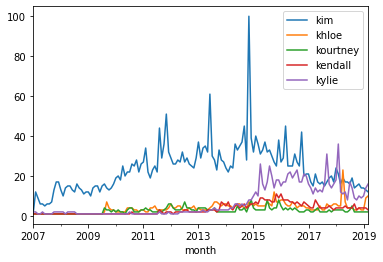

In [20]:
# plot search interest vs. month
import matplotlib
%matplotlib inline
trends.plot();

Oh my! There is so much to make sense of here. Kim's sharp rise in 2007, with the beginning of [Keeping Up with the Kardashians](https://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians), among other things. There was no significant search interest for the other four sisters until mid-2009 when Kourtney and Khloé launched the reality television series, Kourtney and Khloé Take Miami. Then there was Kim's rise from famous to [literally more famous than God](https://trends.google.com/trends/explore?date=all&geo=US&q=%2Fm%2F0261x8t,%2Fm%2F0d05l6) in 2011. This Cosmopolitan article covers the timeline that includes the launch of music videos, fragrances, iPhone and Android games, another television series, joining Instagram, and more. Then there was Kim's ridiculous spike in December 2014: posing naked on the cover of Paper Magazine in a bid to break the internet will do that for you.

Let's look closer from the year 2014


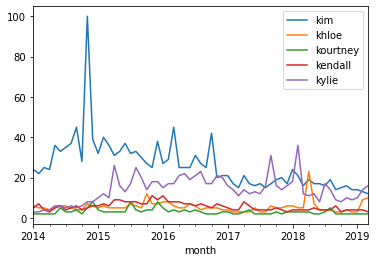

In [22]:
trends.loc["2014-01-01":].plot();

It looks like my suspicion may be true: Kim is not always the most searched Kardashian or Jenner sister. Since late-2016, at various months, Kylie overtakes Kim. Two big spikes where she smashed Kim's search interest: in 2017 when it was reported that Kylie was expecting her first child with rapper Travis Scott and in early 2018 when she gave birth to her daughter, Stormi Webster. The continued success of Kylie Cosmetics has kept her in the news, not to mention making her the "The Youngest Self-Made Billionaire Ever" according to Forbes.

### Rolling Means to smoothen the fluctuations

The plot does not show us if Kim Kardashian is the most famous sister. We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.

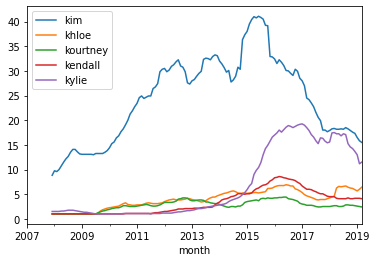

In [23]:
trends.rolling(window=12).mean().plot();

Whoa, okay! So by this metric, Kim is still the most famous sister despite Kylie being close and nearly taking her crown. 

Let's try one last plot; The Kardashians vs the Jenners. It's been a debate since the Jenners were in highschool. And we are going to use the average to make it alittle fair i.e., total search interest divided by the number of sisters in the family line

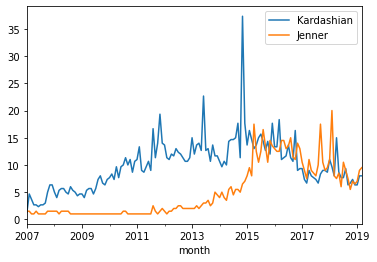

In [26]:
trends['Kardashian'] = (trends.kim + trends.khloe +trends.kourtney)/3
trends['Jenner'] = (trends.kylie + trends.kendall)/2

trends[['Kardashian', 'Jenner']].plot();

I think it's settled! The Kardashians are the more famous sisters than the Jenners, with Kim and Kylie pulling up their score.